In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

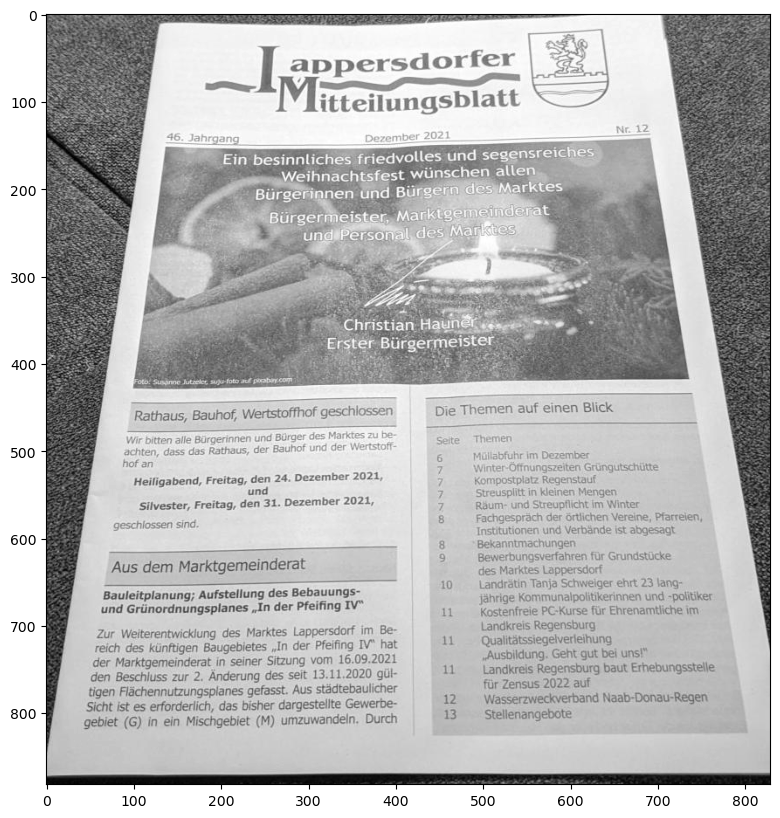

In [2]:
img = cv2.imread('data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

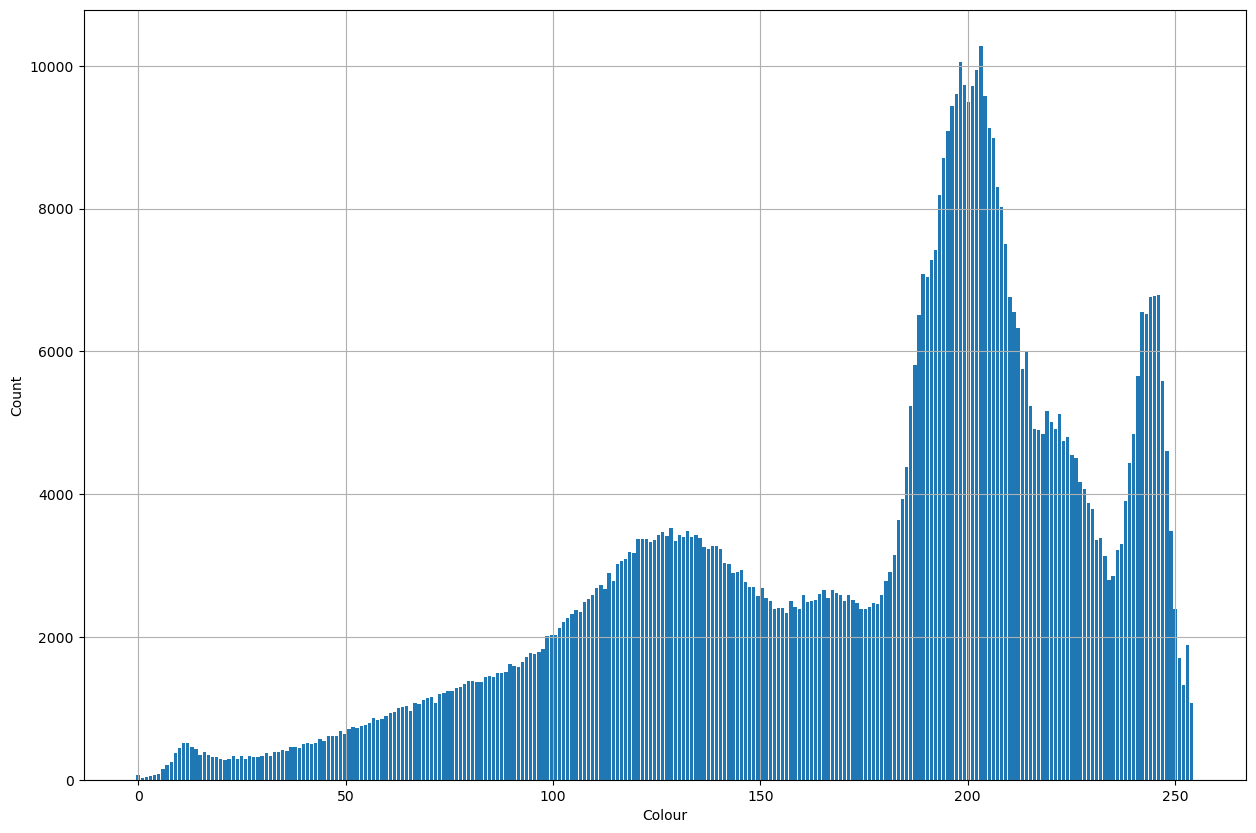

In [3]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

In [4]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows*cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the background
    foreground = img [img >= th]
    # Extract the image pixels corresponding to the background
    background = img[img < th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground)/num_pixels
    omega_b = len(background)/num_pixels
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma2_f = np.var(foreground) if len(foreground) > 0 else 0
    sigma2_b = np.var(background) if len(background) > 0 else 0
    
    # Compute the within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

Optimal threshold 160


(<Axes: >, <matplotlib.image.AxesImage at 0x1df617d0770>)

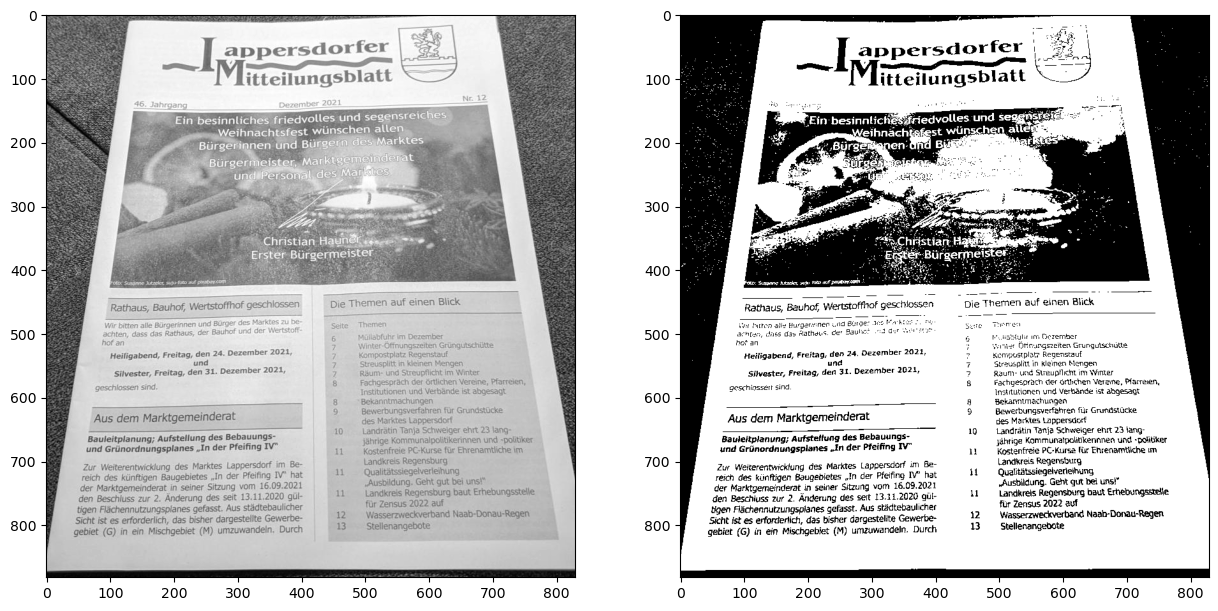

In [5]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

Optimal threshold [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


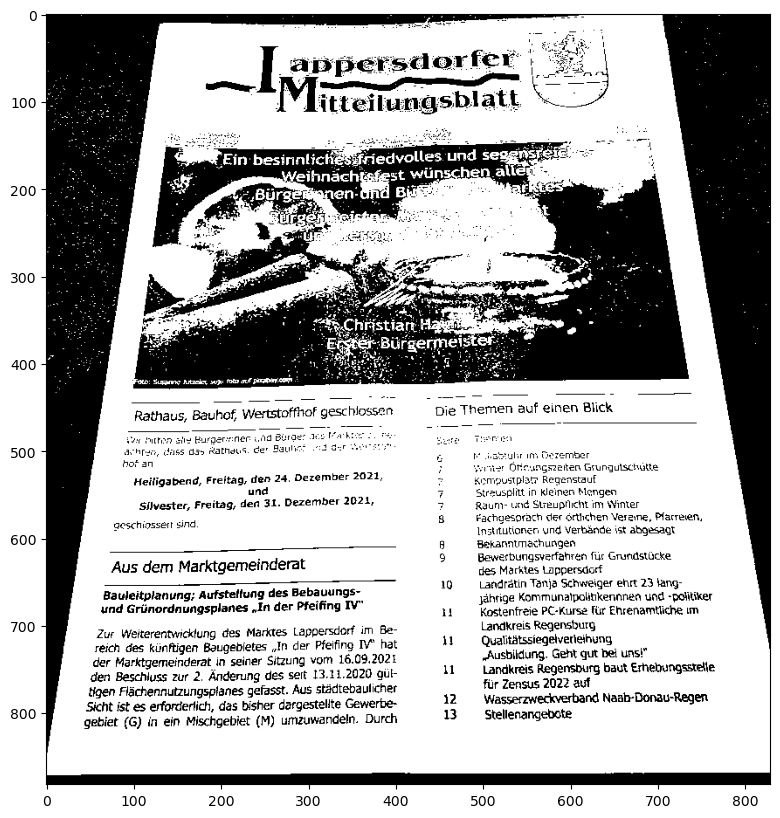

In [6]:
_, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print('Optimal threshold', th2)
plt.imshow(img < th2, cmap='gray')

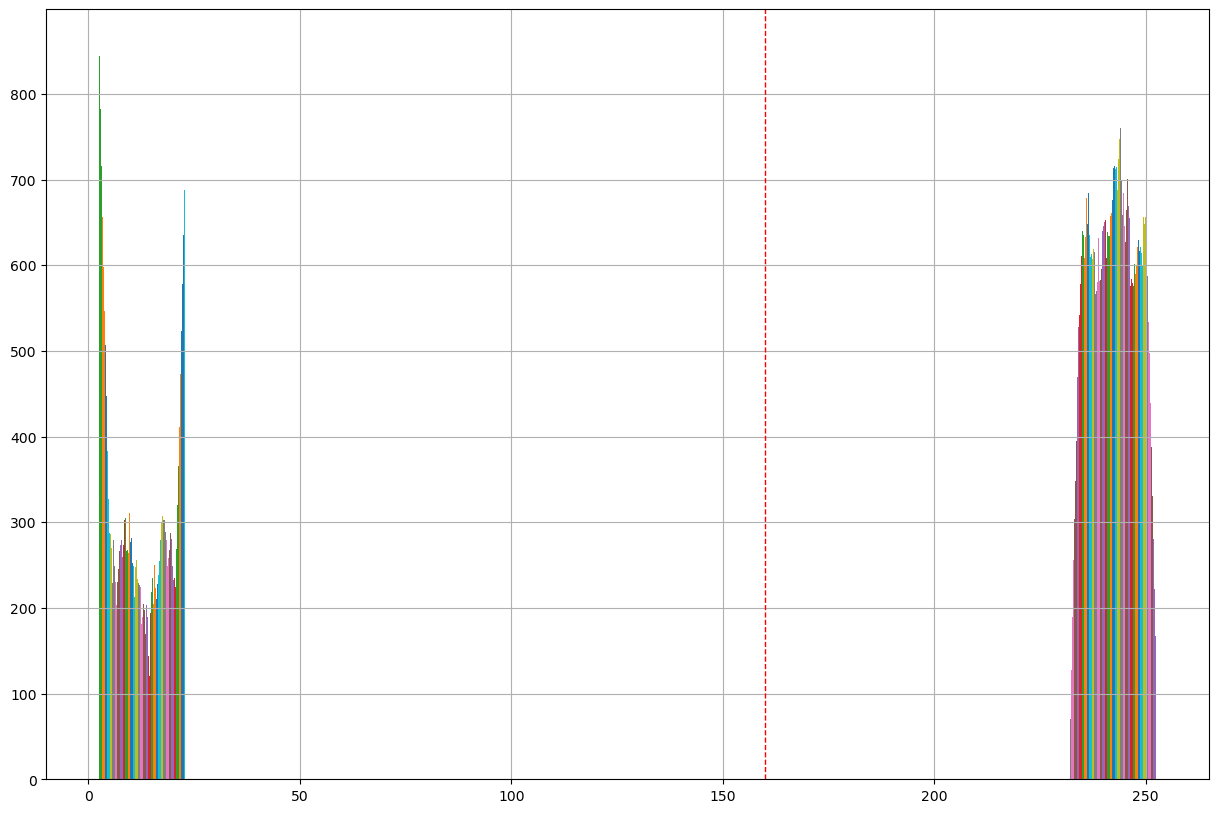

In [7]:
binary_img = (img > opt_th).astype(np.uint8) * 255
plt.hist(binary_img)
plt.grid(True)
plt.axvline(x=opt_th, color='red', linestyle='dashed', linewidth=1)

In [8]:
# Looking at the computed histogram, could it be considered bimodal?
# of course
# Looking at the computed histogram, what binarization threshold would you chose? Why? 
# between the two peaks, this threshold would be the one that minimizes the within-class variance.
# Looking at the resulting (thresholded) image, is the text binarization (detection) good?
# No, I would improve the sharpness, and think about reducing the artifacts